In [196]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
plt.style.use('dark_background')

# Read Input Image

In [523]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 88C3-9794

 C:\Users\ezmedicom\Desktop\VisionAPI 디렉터리

2021-06-02  오후 05:39    <DIR>          .
2021-06-02  오후 05:39    <DIR>          ..
2021-06-02  오후 02:56    <DIR>          .ipynb_checkpoints
2021-06-02  오후 03:39           140,226 .jpg
2021-06-02  오후 03:21           251,689 1.jpg
2021-06-02  오후 02:39           153,750 35r6110.jpg
2021-06-02  오후 03:25             2,543 easy_tesseract.ipynb
2021-05-27  오후 02:49         2,290,266 KakaoTalk_20210527_143110822_03.jpg
2021-06-02  오후 03:59         2,343,604 KakaoTalk_20210602_155735317.jpg
2021-06-02  오후 04:25         2,498,194 KakaoTalk_20210602_162546570.jpg
2021-06-02  오후 04:30           882,246 KakaoTalk_20210602_16254657000.jpg
2021-06-02  오후 04:48         2,381,285 KakaoTalk_20210602_164757358.jpg
2021-06-02  오후 05:00         1,724,359 KakaoTalk_20210602_165946802.jpg
2021-06-02  오후 05:32         2,308,374 KakaoTalk_20210602_173150254.jpg
2021-06-02  오후 05:39         1,674,436 KakaoTalk_20210602_17

In [59]:
pytesseract.get_tesseract_version()

LooseVersion ('5.0.0-alpha.20201127')

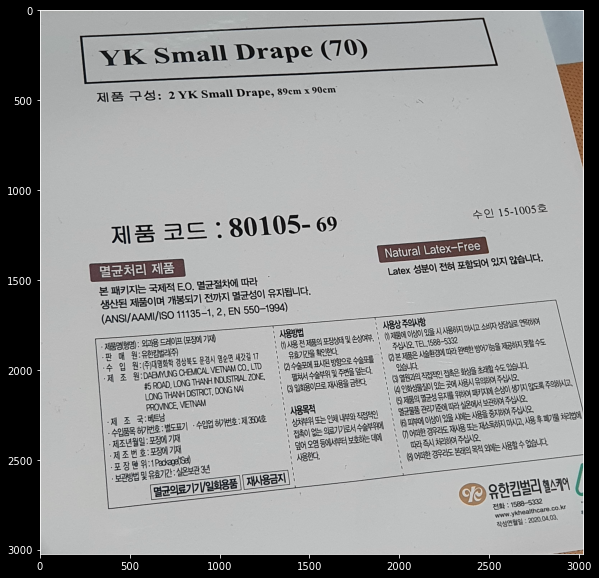

In [524]:
img_original = cv2.imread('KakaoTalk_20210602_173923152.jpg')

height, width, channel = img_original.shape

plt.figure(figsize = (12,10))
plt.imshow(img_original, cmap = 'gray')

# Convert Image to Grayscale
- Image processing을 쉽게 하기 위해, 이미지 컬러 체계 변경

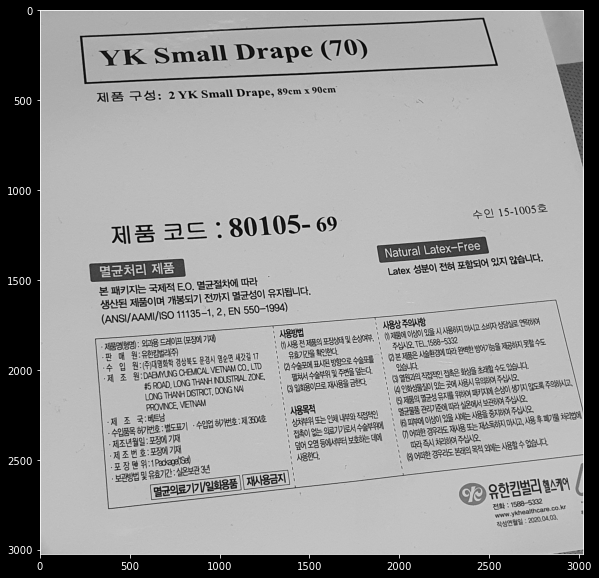

In [525]:
gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (12,10))
plt.imshow(gray, cmap = 'gray')

# Maximize Contrast (Optional)

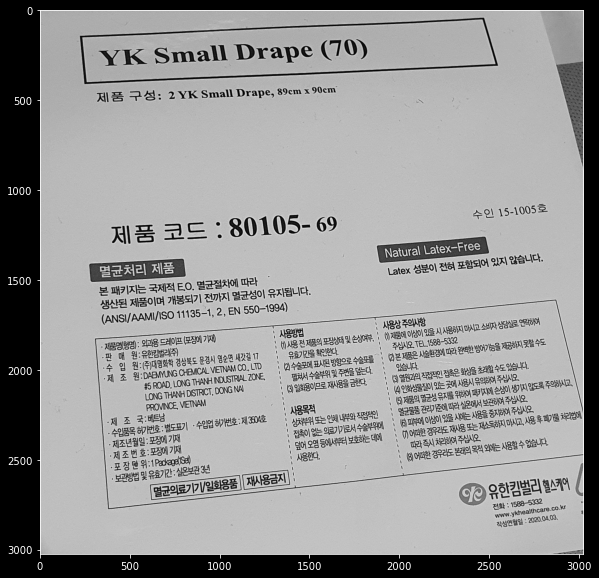

In [526]:
structuringElement = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))

imgTopHat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, structuringElement)
imgBlackHat = cv2.morphologyEx(gray, cv2.MORPH_BLACKHAT, structuringElement)

imgGrayscalePlusTopHat = cv2.add(gray, imgTopHat)
gray = cv2.subtract(imgGrayscalePlusTopHat, imgBlackHat)

plt.figure(figsize = (12,10))
plt.imshow(gray, cmap = 'gray')

# Adaptive Thresholding
- 

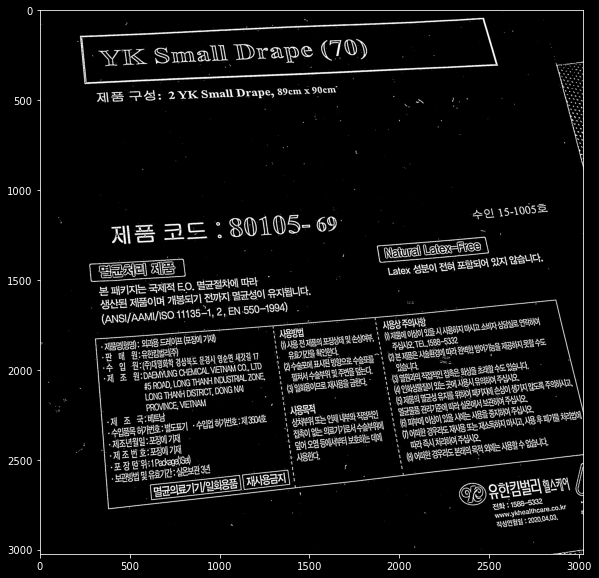

In [527]:
img_blurred = cv2.GaussianBlur(gray, ksize = (5,5), sigmaX = 0) #노이즈를 없애주는 역할 

#이미지 픽셀을 조정해서, 이미지 구분을 확실하게 해주게끔 만듦
#검정과 하얀색으로 조정을 해서 컴퓨터가 값을 확실하게 인식하게끔 만듦
img_thresh = cv2.adaptiveThreshold(img_blurred, maxValue = 255.0,
                                  adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  thresholdType = cv2.THRESH_BINARY_INV,
                                  blockSize = 19, C = 9)

plt.figure(figsize = (12,10))
plt.imshow(img_thresh, cmap = 'gray')

In [530]:
#test
pytesseract.image_to_string(gray, lang = 'kor+eng', config = '--psm 6 --oem 1')

'YK Small Drape (79)\nxx\n제품 구성: 2 YK Small Drape, 89cm x 90cm                                  \'\nxr          °\nA= BE .80105- 69                     수인 15-1005\n멸군처리 제품        Natural Latex-Free\n본 패키지는 국제적 EO. 멸군절자에 따라                                             Latex 성분이 전혀 포함되어 있서 않습니다.\n생산된 제품이며 개봉되기 전까지 BAO 유지됩니다.\n(ANSI/AAMI/ISO 41135-1, 2, EN 550-1994).\ni : ginke Calo 쪼장에 7A)        | Nee           )\\용상주의함              :\nao a goael he nego TaN ESO | (yRigol ofS = a nganionin SHV EES\nK 이 원: (쥐04명화학경상북도문정서 Gam WAT 0 Fe 71을 확인한다.      \\ BAIN 0 1608-5330 roe nan ga\n제 5 이 바드 CHEMCAL VEINS CO; LID  \\ 이에 sneasoe 2288 \\ eal\nWs ROAD, LONG THANH INDUSTRIAL ZONE  \\ \' 길서수술부위및주뿐을덮는.  있습니다.     So ae os        |\nNON THANE DSTRCT, DONG NA       | gesgnee meade gagnpre meee SET ye\nPROVINCE, VIETNAM         :            { 이종 있는규모 021\nye aed ㅣ yee           ! acme a sn ea TR\nAgee as: SEW | _ Ale) ays MSHS seo 0 4와직인  ¥ een evade eS ee\n.제조년월일:포징에 개                 | 전최  Coley en

# Find Contours
- 윤곽선 찾기

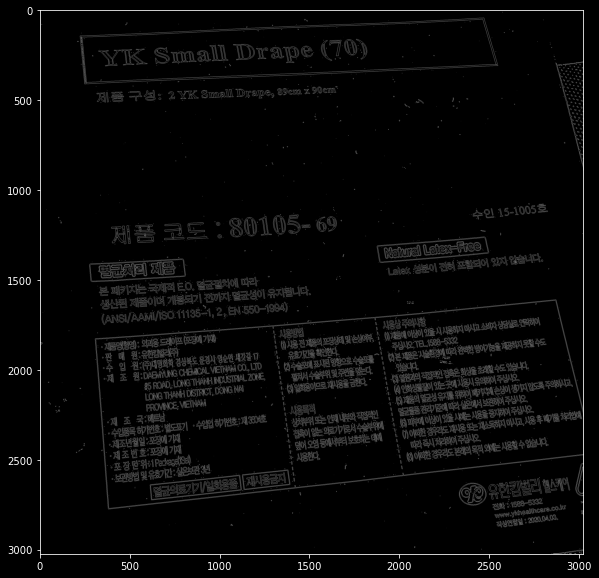

In [531]:
contours,_ = cv2.findContours(img_thresh,
                                  mode = cv2.RETR_LIST,
                                  method = cv2.CHAIN_APPROX_SIMPLE)

temp_result = np.zeros((height, width, channel), dtype = np.uint8)

cv2.drawContours(temp_result, contours = contours, contourIdx = -1, color = (255,255,255))

plt.figure(figsize = (12,10))
plt.imshow(temp_result)

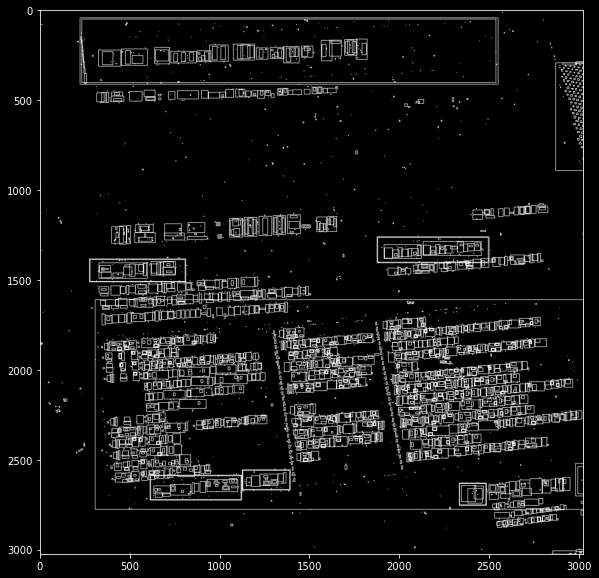

In [532]:
temp_result = np.zeros((height, width, channel), dtype = np.uint8)

contours_dict = []

for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    cv2.rectangle(temp_result, pt1 = (x,y), pt2 = (x+w, y+h), color = (255, 255, 255), thickness = 2)
    
    
    #insert to dict
    contours_dict.append({'contour':contour, 
                          'x':x,
                         'y':y,
                         'w':w,
                         'h':h,
                         'cx':x+(w/2),
                         'cy':y+(h/2)})
    #cx, cy = contour를 감싸는 중심 좌표
    
plt.figure(figsize = (12,10))
plt.imshow(temp_result)

# Select Canidates by Characters Size

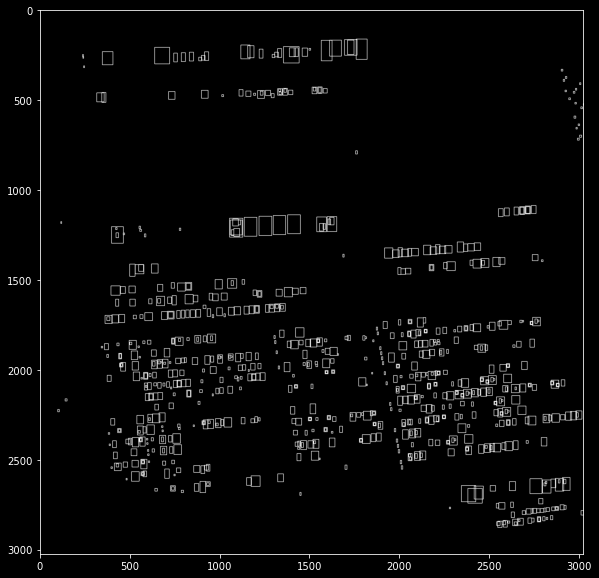

In [533]:
MIN_AREA = 15 #boundingRect의 최소 넓이
MIN_WIDTH, MIN_HEIGHT = 3, 8 #boundingRect의 최소 너비와 높이
MIN_RATIO, MAX_RATIO = 0.4, 1.0 #boundingRect의 가로 대비 세로 비율

possible_contours = []
cnt = 0
#contours_dict를 돌면서, 넓이와 가로대비 세로 비율을 계산해준다
for d in contours_dict:
    area = d['w'] * d['h']
    ratio = d['w'] / d['h']
    
    #조건에 맞는 항목만 찾는 값의 확률임이 높아지기 때문에, 
    if area > MIN_AREA \
    and d['w'] > MIN_WIDTH and d['h'] > MIN_HEIGHT \
    and MIN_RATIO < ratio < MAX_RATIO:
        d['idx'] = cnt #index로 연산
        cnt += 1
        possible_contours.append(d)
        
        
#visualize possible contours
temp_result = np.zeros((height, width, channel), dtype = np.uint8)

for d in possible_contours:
    cv2.rectangle(temp_result, pt1 = (d['x'], d['y']), pt2 = (d['x']+d['w'], d['y']+d['h']), color = (255,255,255),
                  thickness = 2)
    
plt.figure(figsize = (12,10))
plt.imshow(temp_result, cmap = 'gray')

#possible_contours라고 인식되는 애들을 추출

# Select Candidates by Arrangement of Contours

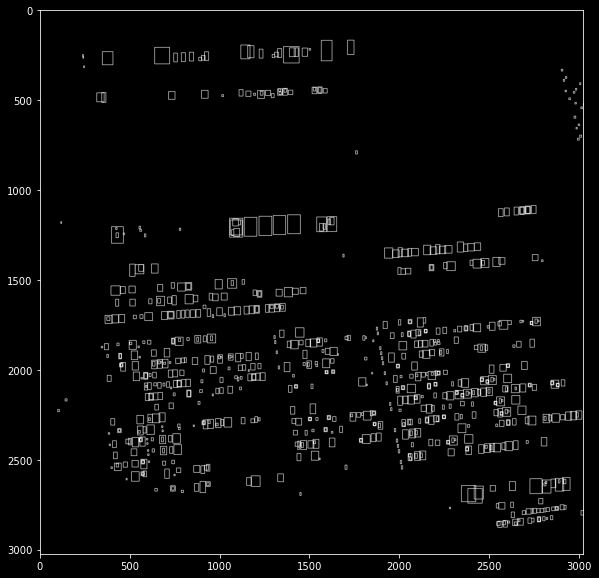

In [534]:
MAX_DIAG_MULTIPLYER = 5 #contour 대각선의 중심과 contour 대각선의 중심 사이의 길이를 제한, 5배보다 멀면 안된다라는 뜻
MAX_ANGLE_DIFF = 5.0 #contour 대각선의 중심과 contour 대각선의 중심을 이었을 때, 직각 삼각형의 예갹(세타)의 최댓값, 너무 벌어지면 후보군에 들지 않는다.
MAX_AREA_DIFF = 0.8 #contour 면적과 contour 면적의 차이가 크게 나면, 인정하지 않는다는 뜻 (같은 글자가 아니라는 뜻)
MAX_WIDTH_DIFF = 0.8 #contour 너비와 contour너비의 차이가 크게 나면, 인정하지 않는다는 뜻 (같은 글자가 아니라는 뜻)
MAX_HEIGHT_DIFF = 0.2 
MIN_N_MATCHED = 3 #위 조건을 만족하는 그룹 내 각각의 개수가 n개 이상일 때 인정한다는 뜻

#Recursive(재귀) 방식으로 후보군을 찾기 위해, 함수화 시켜줌.
def find_chars(contour_list):
    matched_result_idx = [] #최종적으로 남는 결과물의 index 값을 여기에 저장
    
    #contour 1과 contour2를 비교
    for d1 in contour_list:
        matched_contours_idx = []
        
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue
            
            #d1과 d2 사이의 거리를 구하기 위해 도출
            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])
            
            diagonal_length1 = np.sqrt(d1['w']** 2 + d1['h']**2)
            
            #np.linalg.norm: 벡터 a와 벡터 b 사이의 거리를 구한다.
            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx']-d2['cy']]))
            
            if dx == 0:
                angle_diff = 90 #0으로 나눌 수 없기 때문에, 90이라고 설정해줌
            else:
                angle_diff = np.degrees(np.arctan(dy/dx)) #라디안을 도  로 변경하기
                
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h'] / (d1['w'] * d1['h']))
            width_diff = abs(d1['w'] - d2['w'] / d1['w'])
            height_diff = abs(d1['h'] - d2['h'] / d1['h'])
            
            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER\
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF\
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contorus_idx.append(d2['idx'])
            
            #append this contour
            matched_contours_idx.append(d1['idx'])
            
            #후보군의 갯수가 MIN_N_MATCED의 개수보다 작다면, 통과(최종 후보군에서 탈락시킨다는 뜻)
            if len(matched_contours_idx) < MIN_N_MATCHED:
                continue
                
                
            matched_result_idx.append(matched_contours_idx)
            
            
            
            #최종후보군이 아닌 애들도 비교해주기
            unmatched_contour_idx = []
            
            for d4 in contour_list:
                if d4['idx'] not in matched_contours_idx:
                    unmatched_contour_idx.append(d4['idx'])
                    
                    
            unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
            
            
            #recursive
            recursive_contour_list = find_chars(unmatched_contour) #find_chars 함수에 넣고 돌리는 작업
            
            for idx in recursive_contour_list:
                matched_result_idx.append(idx) 
                
            break
            
        return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in result_idx:
    matched_result.append(np.take(possible_contours, idx_list))
    
    
    
#visualize possible contours
temp_result = np.zeros((height, width, channel), dtype = np.uint8)

for r in matched_result:
    for d in r:
        cv2.rectangle(temp_result, pt1 = (d['x'], d['y']), pt2 = (d['x']+d['w'], d['y']+d['h']), color = (255,255,255),
                     thickness = 2)
        
plt.figure(figsize = (12,10))
plt.imshow(temp_result, cmap = 'gray')

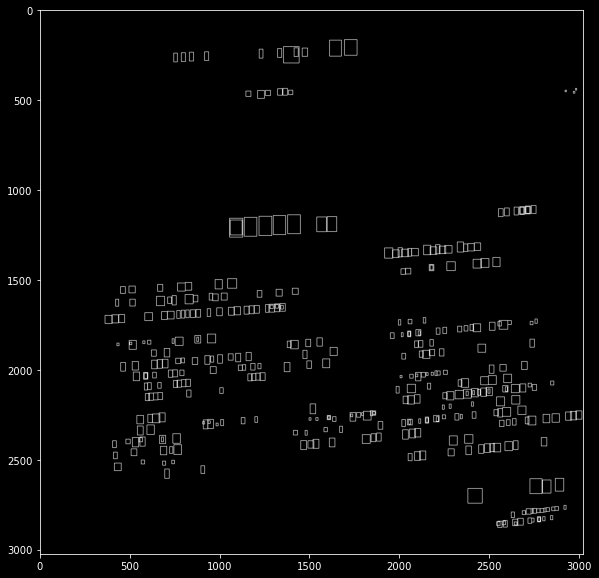

In [535]:
MAX_DIAG_MULTIPLYER = 5 # 5
MAX_ANGLE_DIFF = 12.0 # 12.0
MAX_AREA_DIFF = 0.5 # 0.5
MAX_WIDTH_DIFF = 0.8
MAX_HEIGHT_DIFF = 0.2
MIN_N_MATCHED = 3 # 3

def find_chars(contour_list):
    matched_result_idx = []
    
    for d1 in contour_list:
        matched_contours_idx = []
        for d2 in contour_list:
            if d1['idx'] == d2['idx']:
                continue

            dx = abs(d1['cx'] - d2['cx'])
            dy = abs(d1['cy'] - d2['cy'])

            diagonal_length1 = np.sqrt(d1['w'] ** 2 + d1['h'] ** 2)

            distance = np.linalg.norm(np.array([d1['cx'], d1['cy']]) - np.array([d2['cx'], d2['cy']]))
            if dx == 0:
                angle_diff = 90
            else:
                angle_diff = np.degrees(np.arctan(dy / dx))
            area_diff = abs(d1['w'] * d1['h'] - d2['w'] * d2['h']) / (d1['w'] * d1['h'])
            width_diff = abs(d1['w'] - d2['w']) / d1['w']
            height_diff = abs(d1['h'] - d2['h']) / d1['h']

            if distance < diagonal_length1 * MAX_DIAG_MULTIPLYER \
            and angle_diff < MAX_ANGLE_DIFF and area_diff < MAX_AREA_DIFF \
            and width_diff < MAX_WIDTH_DIFF and height_diff < MAX_HEIGHT_DIFF:
                matched_contours_idx.append(d2['idx'])

        # append this contour
        matched_contours_idx.append(d1['idx'])

        if len(matched_contours_idx) < MIN_N_MATCHED:
            continue

        matched_result_idx.append(matched_contours_idx)

        unmatched_contour_idx = []
        for d4 in contour_list:
            if d4['idx'] not in matched_contours_idx:
                unmatched_contour_idx.append(d4['idx'])

        unmatched_contour = np.take(possible_contours, unmatched_contour_idx)
        
        # recursive
        recursive_contour_list = find_chars(unmatched_contour)
        
        for idx in recursive_contour_list:
            matched_result_idx.append(idx)

        break

    return matched_result_idx
    
result_idx = find_chars(possible_contours)

matched_result = []
for idx_list in tqdm(result_idx):
    matched_result.append(np.take(possible_contours, idx_list))

# visualize possible contours
temp_result = np.zeros((height, width, channel), dtype=np.uint8)

for r in matched_result:
    for d in r:
#         cv2.drawContours(temp_result, d['contour'], -1, (255, 255, 255))
        cv2.rectangle(temp_result, pt1=(d['x'], d['y']), pt2=(d['x']+d['w'], d['y']+d['h']), color=(255, 255, 255), thickness=2)

plt.figure(figsize=(12, 10))
plt.imshow(temp_result, cmap='gray')

# Rotate Plate Images
- 이미지를 돌려 똑바로 인식할 수 있게끔 설정
- Affine Transform

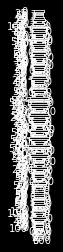

In [536]:
PLATE_WIDTH_PADDING = 1.3
PLATE_HEIGHT_PADDING = 1.5
MIN_PLATE_RATIO = 3
MAX_PLATE_RATIO = 10

plate_imgs = []
plate_infos = []

for i, matched_chars in enumerate(matched_result):
    sorted_chars = sorted(matched_chars, key = lambda x: x['cx']) #x 방향으로 순차적으로 정렬
    
    plate_cx = (sorted_chars[0]['cx'] + sorted_chars[-1]['cx'] / 2)
    plate_cy = (sorted_chars[0]['cy'] + sorted_chars[-1]['cy'] / 2) #plate라고 생각되는 아이들의 센터 좌표를 구해준다.
    
    plate_width = (sorted_chars[-1]['x'] + sorted_chars[-1]['w'] - sorted_chars[0]['x']) * PLATE_WIDTH_PADDING
    
    sum_height = 0
    for d in sorted_chars:
        sum_height += d['h']
        
    plate_height = int(sum_height / len(sorted_chars) * PLATE_HEIGHT_PADDING)
    
    triangle_height = sorted_chars[-1]['cy'] - sorted_chars[0]['cy'] #삼각형의 높이
    triangle_hypotenus = np.linalg.norm(np.array([sorted_chars[0]['cx'], sorted_chars[0]['cy']]) - 
                                       np.array([sorted_chars[-1]['cx'], sorted_chars[-1]['cy']])) #빗변의 거리
    
    angle = np.degrees(np.arcsin(triangle_height / triangle_hypotenus))
    
    rotation_matrix = cv2.getRotationMatrix2D(center = (plate_cx, plate_cy), angle = angle, scale = 1.0)
    
    img_rotated = cv2.warpAffine(img_thresh, M=rotation_matrix, dsize=(width, height))
    
    img_cropped = cv2.getRectSubPix(
        img_rotated, 
        patchSize=(int(plate_width), int(plate_height)), 
        center=(int(plate_cx), int(plate_cy)))
    
    if img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO or img_cropped.shape[1] / img_cropped.shape[0] < MIN_PLATE_RATIO > MAX_PLATE_RATIO:
        continue
    
    plate_imgs.append(img_cropped)
    plate_infos.append({'x': int(plate_cx - plate_width / 2),
        'y': int(plate_cy - plate_height / 2),
        'w': int(plate_width),
        'h': int(plate_height)})
    
    plt.subplot(len(matched_result), 1, i+1)
    plt.imshow(img_cropped, cmap='gray')

In [358]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-vi271kac\opencv\modules\imgproc\src\smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'cv::GaussianBlur'


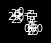

In [363]:
longest_idx, longest_text = -1, 0
plate_chars = []

for i, plate_img in enumerate(plate_imgs):
    plate_img = cv2.resize(plate_img, dsize=(0, 0), fx=1.6, fy=1.6)
    _, plate_img = cv2.threshold(plate_img, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    
    # find contours again (same as above)
    contours, _ = cv2.findContours(plate_img, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
    
    plate_min_x, plate_min_y = plate_img.shape[1], plate_img.shape[0]
    plate_max_x, plate_max_y = 0, 0

    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        area = w * h
        ratio = w / h

        if area > MIN_AREA \
        and w > MIN_WIDTH and h > MIN_HEIGHT \
        and MIN_RATIO < ratio < MAX_RATIO:
            if x < plate_min_x:
                plate_min_x = x
            if y < plate_min_y:
                plate_min_y = y
            if x + w > plate_max_x:
                plate_max_x = x + w
            if y + h > plate_max_y:
                plate_max_y = y + h
                
    img_result = plate_img[plate_min_y:plate_max_y, plate_min_x:plate_max_x]
    
    img_result = cv2.GaussianBlur(img_result, ksize=(3, 3), sigmaX=0)
    _, img_result = cv2.threshold(img_result, thresh=0.0, maxval=255.0, type=cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_result = cv2.copyMakeBorder(img_result, top=10, bottom=10, left=10, right=10, borderType=cv2.BORDER_CONSTANT, value=(0,0,0))

    chars = pytesseract.image_to_string(img_result, lang='eng+kor', config='--psm 6 --oem 1')
    
    result_chars = ''
    has_digit = False
    for c in chars:
        if ord('가') <= ord(c) <= ord('힣') or c.isdigit():
            if c.isdigit():
                has_digit = True
            result_chars += c
    
    print(result_chars)
    plate_chars.append(result_chars)

    if has_digit and len(result_chars) > longest_text:
        longest_idx = i

    plt.subplot(len(plate_imgs), 1, i+1)
    plt.imshow(img_result, cmap='gray')

In [ ]:
chars

In [ ]:

info = plate_infos[longest_idx]
chars = plate_chars[longest_idx]

print(chars)

img_out = img_original.copy()

cv2.rectangle(img_out, pt1=(info['x'], info['y']), pt2=(info['x']+info['w'], info['y']+info['h']), color=(255,0,0), thickness=2)

cv2.imwrite(chars + '.jpg', img_out)

plt.figure(figsize=(12, 10))
plt.imshow(img_out)